In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [4]:
data=pd.read_csv(r'S:\Data_Science\Data_Science_Intern\creditcard.csv')

In [5]:
print(data.head())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

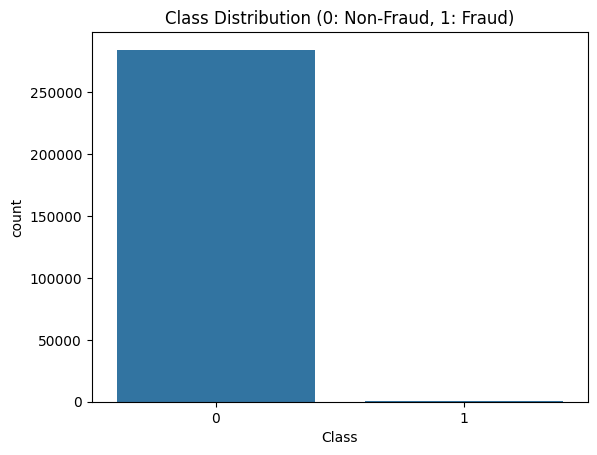

In [6]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

In [7]:
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target variable (0 for non-fraud, 1 for fraud)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

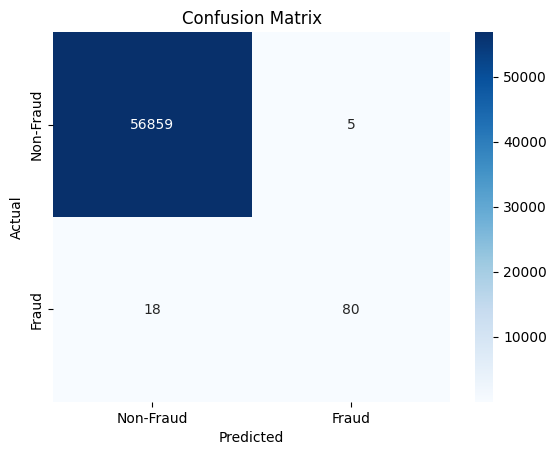

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [19]:
print("Accuracy: ", accuracy)
print("ROC AUC Score: ", roc_auc)

Accuracy:  0.9995962220427653
ROC AUC Score:  0.9081193007591333


In [20]:
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target variable (0 for non-fraud, 1 for fraud)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
print('Original dataset shape:', Counter(y))  # To check the class distribution before SMOTE

Original dataset shape: Counter({0: 284315, 1: 492})


In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [29]:
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({0: 284315, 1: 284315})


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (454904, 30)
Testing set shape: (113726, 30)


In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)  

In [35]:
y_pred_logistic = logistic_model.predict(X_test)

In [36]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results:
[[55361  1389]
 [ 4289 52687]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Accuracy (Logistic Regression): 0.9500729824314581


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("\nRandom Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))